Test file for calibrations

Master flat created and saved to /home/gtulloch/obsy/sample_data/Processing/master_flat.fits


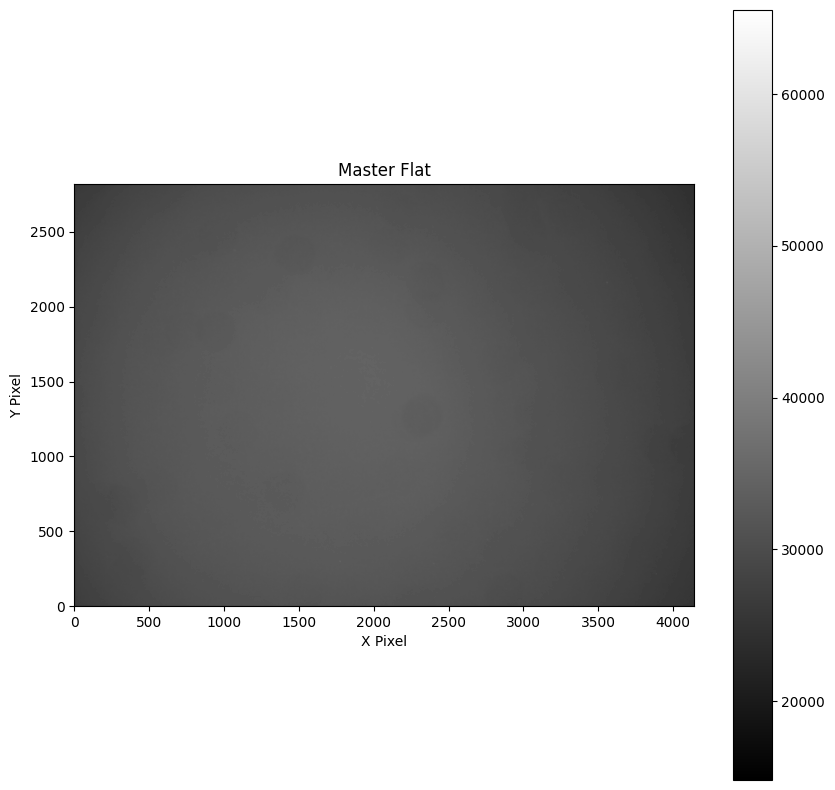

In [3]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np

# Function to display the master flat
def display_master_flat(fits_file_path):
    # Open the FITS file
    with fits.open(fits_file_path) as hdul:
        # Get the data from the primary HDU
        master_flat_data = hdul[0].data

    # Display the image using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(master_flat_data, cmap='gray', origin='lower')
    plt.colorbar()
    plt.title('Master Flat')
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.show()

def create_master_flat(folder_path, output_path):
    # List all FITS files in the folder
    fits_files = [f for f in os.listdir(folder_path) if f.endswith('.fits')]

    if not fits_files:
        raise ValueError("No FITS files found in the specified folder.")

    # Read the data from each FITS file and store it in a list
    flat_data_list = []
    for fits_file in fits_files:
        file_path = os.path.join(folder_path, fits_file)
        with fits.open(file_path) as hdul:
            flat_data_list.append(hdul[0].data)

    # Stack the data along a new axis and compute the median
    flat_stack = np.stack(flat_data_list, axis=0)
    master_flat_data = np.median(flat_stack, axis=0)

    # Create a new FITS HDU (Header/Data Unit) with the master flat data
    hdu = fits.PrimaryHDU(master_flat_data)

    # Write the master flat to a new FITS file
    hdu.writeto(output_path, overwrite=True)

    print(f"Master flat created and saved to {output_path}")
    
# Example usage
folder_path = '/home/gtulloch/obsy/sample_data/Processing/repo/Calibrate/Flat/ES_AR102_Primary_600@F_5.9/ZWO_CCD_ASI294MC/OSC/20241030'
output_path = '/home/gtulloch/obsy/sample_data/Processing/master_flat.fits'
create_master_flat(folder_path, output_path)
display_master_flat(output_path)
